In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

def configure_plots():
    '''Configures plots by making some quality of life adjustments'''
    for _ in range(2):
        plt.rcParams['figure.figsize'] = [16/2, 9/2]
        plt.rcParams['axes.titlesize'] = 20
        plt.rcParams['axes.labelsize'] = 16
        plt.rcParams['xtick.labelsize'] = 14
        plt.rcParams['ytick.labelsize'] = 14
        plt.rcParams['lines.linewidth'] = 2

configure_plots()

In [12]:
import pandas as pd
import numpy as np

med = pd.read_csv("../data/med.csv")
people = pd.read_csv("../data/people.csv")
combined= pd.read_csv("../data/combined.csv")

oldest_in_ed = people[people["Education Program"]==True]["Age"].max()
#print(f'Oldest age of a child in the education program: {oldest_in_ed}')

kids =  people[people["Age"] < 15]

percent_in_ed = np.round(np.mean(kids["Education Program"])*100, 2)
#print(f'Percent of kids participating in the education program: {percent_in_ed}%')

In [13]:
import seaborn as sns

def barplot(df, hue, x):
        data = df[[hue, x, "Gender"]] \
                .groupby([hue, x], as_index=False) \
                .aggregate('count')

        data = data.rename({'Gender': 'Proportion'}, axis=1)

        data.loc[data[hue], "Proportion"] = data[data[hue]]["Proportion"] / data[data[hue]]["Proportion"].sum()
        data.loc[data[hue]==False, "Proportion"] = data[data[hue]==False]["Proportion"] / data[data[hue]==False]["Proportion"].sum()

        sns.barplot(x=x, y="Proportion", hue=hue, data=data)

In [14]:
import datetime

def summarize_program(df, program): 

    print("Summarizing differences between groups:")

    percent_in = np.round(np.mean(df[program]==True)*100, 2)
    print(f'Percent participating in {program}: {percent_in}%')
    
    in_program = df[df[program]==True]
    no_program = df[df[program]==False]

    #Compare age between groups 
    mean_age = np.round(np.mean(in_program["Age At Fair"]),2)
    no_mean_age = np.round(np.mean(no_program["Age At Fair"]),2)
    print(f'Average age program: {mean_age}')
    print(f'Average age not: {no_mean_age}')

    #Compare gender between groups
    percent_male = np.round(np.mean(in_program["Gender"]=="m")*100, 2)
    no_percent_male = np.round(np.mean(no_program["Gender"]=="m")*100, 2)
    print(f'Percent male program: {percent_male}%')
    print(f'Percent male not: {no_percent_male}%')

    #Compare height between groups
    mean_height = np.round(np.mean(in_program["Height"]),2)
    no_mean_height = np.round(np.mean(no_program["Height"]),2)
    print(f'Average height program: {mean_height}')
    print(f'Average height not: {no_mean_height}')

    #Compare weight between groups
    mean_weight = np.round(np.mean(in_program["Weight"]),2)
    no_mean_weight = np.round(np.mean(no_program["Weight"]),2)
    print(f'Average weight program: {mean_weight}')
    print(f'Average weight not: {no_mean_weight}')

    print("\nComparing medical health between groups:")

    #compare bmi between groups
    mean_bmi = np.round(np.mean(in_program["Bmi"]),2)
    no_mean_bmi = np.round(np.mean(no_program["Bmi"]),2)

    print(f'Average bmi program: {mean_bmi}')
    print(f'Average bmi not: {no_mean_bmi}')

    #compare soda sugar between groups
    mean_sugar = np.round(np.mean(in_program["Soda Sugar"]),2)
    no_mean_sugar = np.round(np.mean(no_program["Soda Sugar"]),2)

    print(f'Average sugar program: {mean_sugar}')
    print(f'Average sugar not: {no_mean_sugar}')

    #compare blood sugar between groups
    mean_blood_sugar = np.round(np.mean(in_program[in_program["Fast"]==True]["Blood Sugar"]),2)
    no_mean_blood_sugar = np.round(np.mean(no_program[no_program["Fast"]==True]["Blood Sugar"]),2)

    print(f'Average blood sugar (among fasting) program: {mean_blood_sugar}')
    print(f'Average blood sugar (among fasting) not: {no_mean_blood_sugar}')

    print("\nComparing dental health between groups:")

    #Compare cavities between groups
    mean_cav = np.round(np.mean(in_program["Cavities"]),2)
    no_mean_cav = np.round(np.mean(no_program["Cavities"]),2)

    print(f'Average cavities program: {mean_cav}')
    print(f'Average cavities not: {no_mean_cav}')

    #compare missing between groups
    mean_miss = np.round(np.mean(in_program["Missing"]),2)
    no_mean_miss = np.round(np.mean(no_program["Missing"]),2)

    print(f'Average missing program: {mean_miss}')
    print(f'Average missing not: {no_mean_miss}')

    #f = plt.figure(figsize=(16, 16))

    barplot(df, program, "Oral Hygiene")
    plt.show()
    barplot(df, program, "Cavity Risk")
    plt.show()



In [15]:
med_to_merge = med.reset_index().set_index("Individual Id")
kids_med = kids.merge(med, on="Individual Id", how="left")

#Adding age at fair
combined_filtered = combined.reset_index().set_index("Individual Id")["Age At Fair"]
kids_med = kids_med.merge(combined_filtered, on="Individual Id", how="left")

kids_med_23 = kids_med[kids_med["Date"] == str(datetime.date(2023, 4, 1))]

----------------------------------------------------------------------
ANALYSIS 4/23 FEED A FAMILY

Summarizing differences between groups:
Percent participating in Feed A Family: 76.92%
Average age program: 20.47
Average age not: 19.86
Percent male program: 30.0%
Percent male not: 55.0%
Average height program: 135.87
Average height not: 144.35
Average weight program: 47.51
Average weight not: 58.78

Comparing medical health between groups:
Average bmi program: 23.37
Average bmi not: 25.56
Average sugar program: 36.37
Average sugar not: 35.68
Average blood sugar (among fasting) program: 108.69
Average blood sugar (among fasting) not: 101.57

Comparing dental health between groups:
Average cavities program: 2.39
Average cavities not: 2.72
Average missing program: 1.46
Average missing not: 1.31


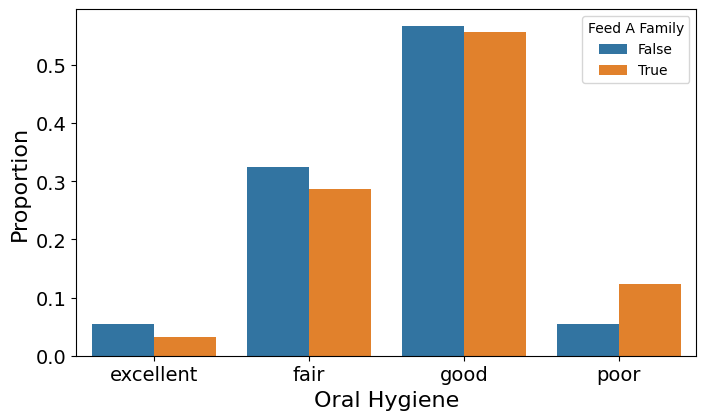

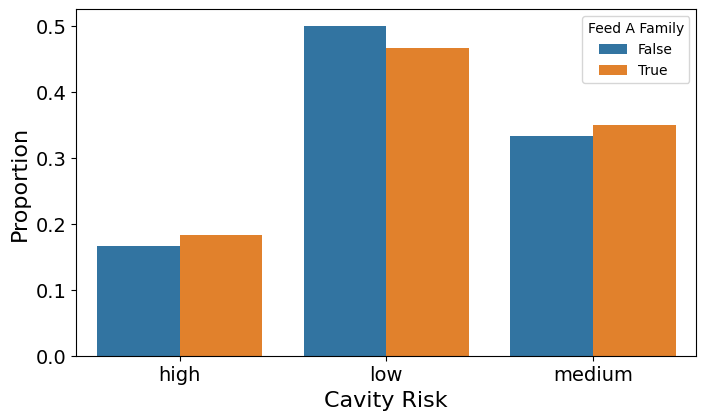

In [16]:
print("--------------"*5)
print("ANALYSIS 4/23 FEED A FAMILY\n")
combined23 = combined[combined["Date"] == str(datetime.date(2023, 4, 1))]
summarize_program(combined23, "Feed A Family")

----------------------------------------------------------------------
ANALYSIS 4/23 SUPER SATURDAY PROGRAM

Summarizing differences between groups:
Percent participating in Super Saturday: 77.47%
Average age program: 20.41
Average age not: 19.86
Percent male program: 30.5%
Percent male not: 55.0%
Average height program: 136.0
Average height not: 144.35
Average weight program: 47.44
Average weight not: 58.78

Comparing medical health between groups:
Average bmi program: 23.32
Average bmi not: 25.56
Average sugar program: 36.1
Average sugar not: 35.68
Average blood sugar (among fasting) program: 108.69
Average blood sugar (among fasting) not: 101.57

Comparing dental health between groups:
Average cavities program: 2.37
Average cavities not: 2.72
Average missing program: 1.45
Average missing not: 1.31


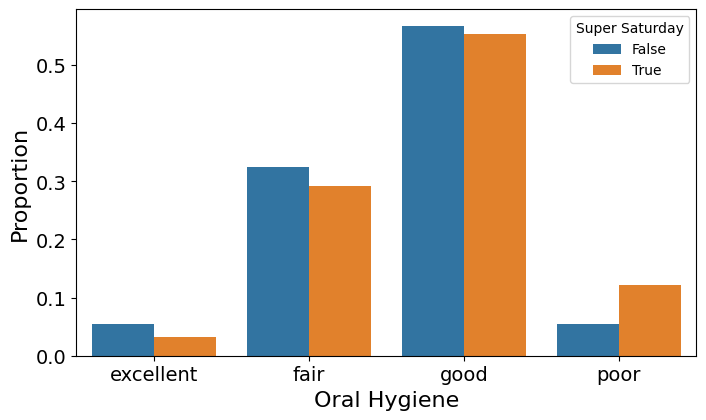

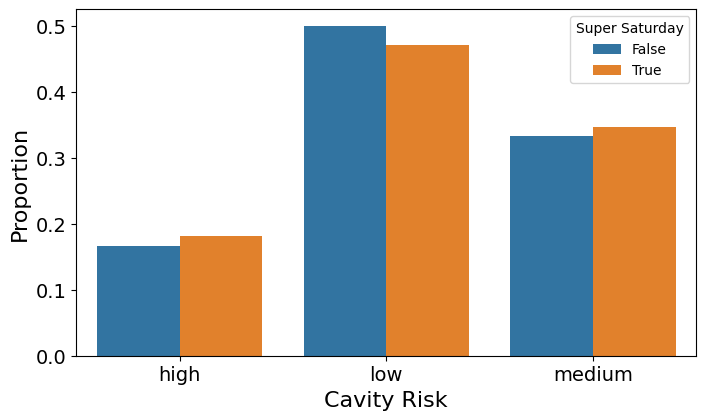

In [17]:
print("--------------"*5)
print("ANALYSIS 4/23 SUPER SATURDAY PROGRAM\n")
summarize_program(combined23, "Super Saturday")

----------------------------------------------------------------------
ANALYSIS 4/23 EDUCATION PROGRAM
(Population is all kids 14 and under)

Summarizing differences between groups:
Percent participating in Education Program: 44.07%
Average age program: 8.46
Average age not: 5.99
Percent male program: 44.83%
Percent male not: 56.04%
Average height program: 133.81
Average height not: 120.41
Average weight program: 35.36
Average weight not: 30.96

Comparing medical health between groups:
Average bmi program: 19.32
Average bmi not: 18.75
Average sugar program: 41.81
Average sugar not: 32.46
Average blood sugar (among fasting) program: 89.0
Average blood sugar (among fasting) not: 103.05

Comparing dental health between groups:
Average cavities program: 2.39
Average cavities not: 2.57
Average missing program: 0.12
Average missing not: 0.19


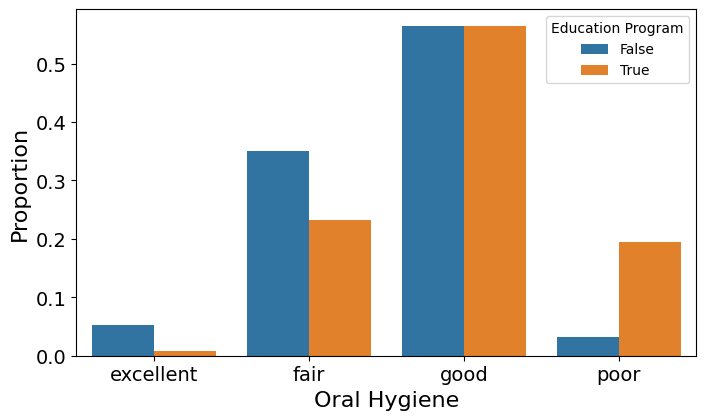

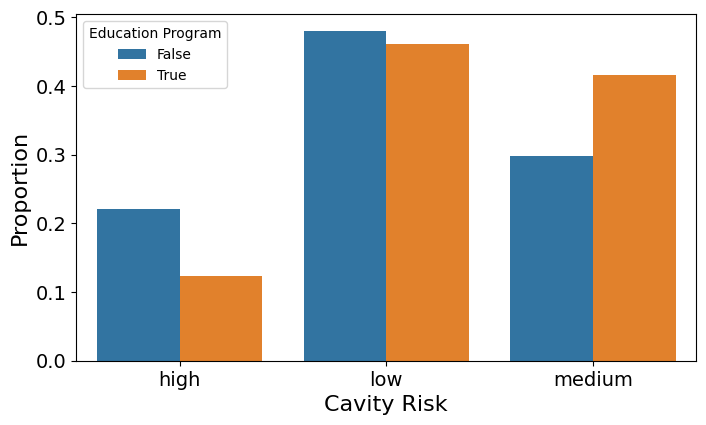

In [18]:
print("--------------"*5)
print("ANALYSIS 4/23 EDUCATION PROGRAM")
print("(Population is all kids 14 and under)\n")
summarize_program(kids_med_23, "Education Program")

In [19]:

#combined422 = combined[combined["Date"] == str(datetime.date(2022, 4, 1))]
#summarize_program(combined422, "Super Saturday")

#print("--------------"*5)
#print("ANALYSIS 4/23 SUPER SATURDAY PROGRAM\n")
#summarize_program(combined23, "Super Saturday")

#jupyter nbconvert notebooks/med_analysis.ipynb --to html --TemplateExporter.exclude_input=True